<a href="https://colab.research.google.com/github/kridtapon/Volatility-For-Trading/blob/main/Volatility.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance numpy pandas matplotlib statsmodels

In [ ]:
pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.3 MB/s eta 0:00:00


In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf

In [ ]:
# Download Apple stock data using yfinance
aapl_data = yf.download('AAPL', start='2018-01-01', end='2024-01-01')

[*********************100%***********************]  1 of 1 completed


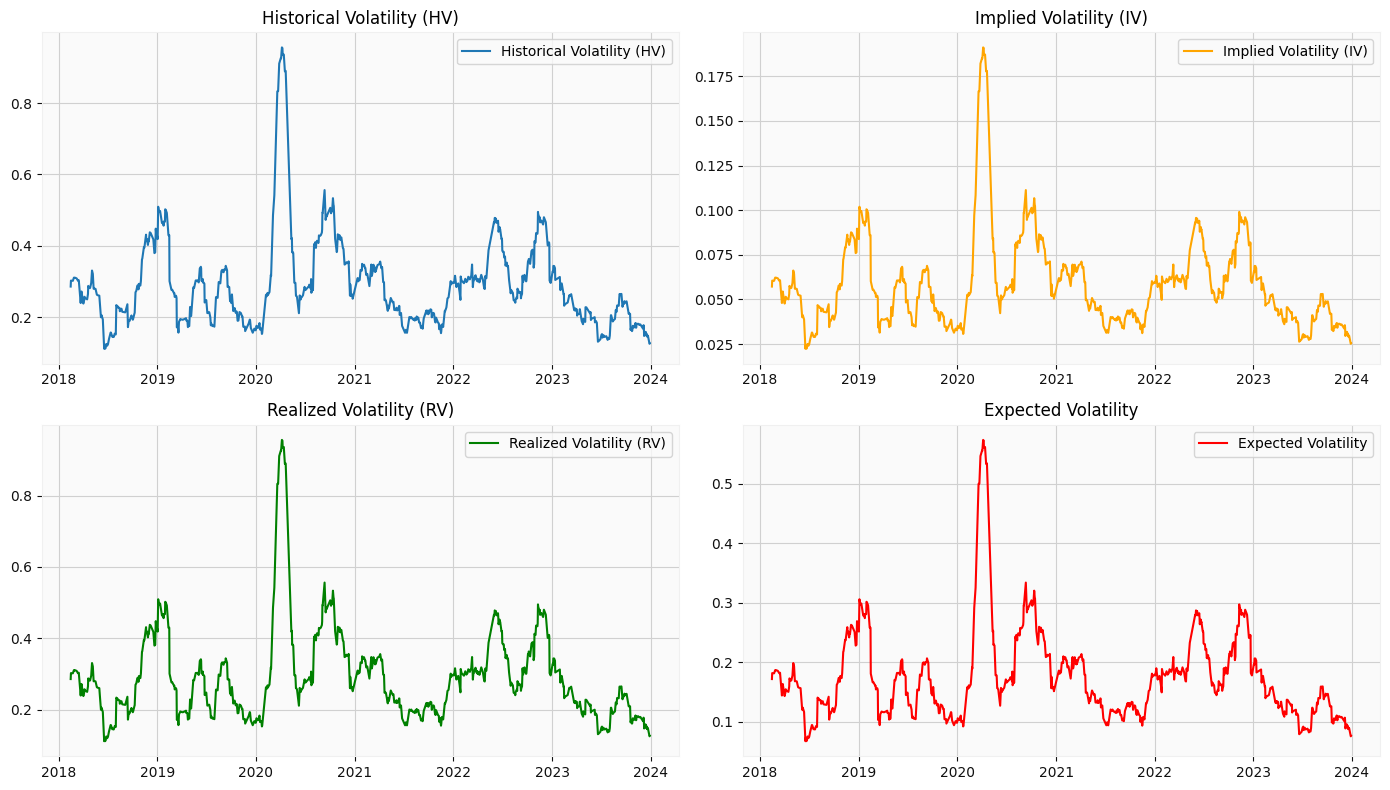

In [ ]:
# Calculate daily returns
aapl_data['Return'] = aapl_data['Adj Close'].pct_change()

# Remove NaN values
aapl_data.dropna(inplace=True)

# 1. Historical Volatility (HV)
def historical_volatility(data, window=30):
    return data['Return'].rolling(window=window).std() * np.sqrt(252)

aapl_data['HV'] = historical_volatility(aapl_data)

# 2. Implied Volatility (IV) - Using the return rolling standard deviation as a proxy
# Implied volatility typically needs options data; here we assume a proxy for simplicity
aapl_data['IV'] = aapl_data['Return'].rolling(window=30).std() * np.sqrt(252) * 0.2  # Arbitrary scaling factor

# 3. Realized Volatility (RV)
def realized_volatility(data, window=30):
    return data['Return'].rolling(window=window).std() * np.sqrt(252)

aapl_data['RV'] = realized_volatility(aapl_data)

# 4. Expected Volatility - Blend of Implied and Historical Volatility
aapl_data['Expected_Volatility'] = (aapl_data['HV'] + aapl_data['IV']) / 2

# Plotting Results for Visualization
plt.figure(figsize=(14, 8))

# Plot Historical Volatility
plt.subplot(2, 2, 1)
plt.plot(aapl_data['HV'], label='Historical Volatility (HV)')
plt.title('Historical Volatility (HV)')
plt.legend()

# Plot Implied Volatility
plt.subplot(2, 2, 2)
plt.plot(aapl_data['IV'], label='Implied Volatility (IV)', color='orange')
plt.title('Implied Volatility (IV)')
plt.legend()

# Plot Realized Volatility
plt.subplot(2, 2, 3)
plt.plot(aapl_data['RV'], label='Realized Volatility (RV)', color='green')
plt.title('Realized Volatility (RV)')
plt.legend()

# Plot Expected Volatility
plt.subplot(2, 2, 4)
plt.plot(aapl_data['Expected_Volatility'], label='Expected Volatility', color='red')
plt.title('Expected Volatility')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Save the data to a CSV file for external analysis
aapl_data[['Return', 'HV', 'IV', 'RV', 'Expected_Volatility']].to_csv('aapl_volatility_data.csv')

# Print the first few rows to check
print(aapl_data[['Return', 'HV', 'IV', 'RV', 'Expected_Volatility']].tail())

Price                        Return        HV        IV        RV  \
Ticker                                                              
Date                                                                
2023-12-22 00:00:00+00:00 -0.005547  0.148199  0.029640  0.148199   
2023-12-26 00:00:00+00:00 -0.002841  0.134498  0.026900  0.134498   
2023-12-27 00:00:00+00:00  0.000518  0.131291  0.026258  0.131291   
2023-12-28 00:00:00+00:00  0.002226  0.125622  0.025124  0.125622   
2023-12-29 00:00:00+00:00 -0.005424  0.126878  0.025376  0.126878   

Price                     Expected_Volatility  
Ticker                                         
Date                                           
2023-12-22 00:00:00+00:00            0.088919  
2023-12-26 00:00:00+00:00            0.080699  
2023-12-27 00:00:00+00:00            0.078775  
2023-12-28 00:00:00+00:00            0.075373  
2023-12-29 00:00:00+00:00            0.076127  


In [ ]:
# Calculate correlation between returns and different types of volatility
correlation_hv = aapl_data['Return'].corr(aapl_data['HV'])
correlation_iv = aapl_data['Return'].corr(aapl_data['IV'])
correlation_rv = aapl_data['Return'].corr(aapl_data['RV'])
correlation_expected_vol = aapl_data['Return'].corr(aapl_data['Expected_Volatility'])

print(f"Correlation with HV: {correlation_hv}")
print(f"Correlation with IV: {correlation_iv}")
print(f"Correlation with RV: {correlation_rv}")
print(f"Correlation with Expected Volatility: {correlation_expected_vol}")

Correlation with HV: -0.0076695931358794845
Correlation with IV: -0.007669593135879502
Correlation with RV: -0.0076695931358794845
Correlation with Expected Volatility: -0.007669593135879489
